# Interactive CIE Standard Overcast Sky Model

Explore how the **CIE luminance distribution** varies across the sky dome.

## The CIE Formula

$$L(\theta) = L_z \cdot \frac{1 + 2\sin(\theta)}{3}$$

Where:
- $L(\theta)$ = Sky luminance at elevation angle $\theta$
- $L_z$ = Zenith luminance (reference)
- $\theta$ = Elevation angle (0° = horizon, 90° = zenith)

**Key insight:** Since $z = \sin(\theta)$, the formula becomes: $L \propto (1 + 2z)$


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox
import ipywidgets as widgets

%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 5]


## 1. Explore sin(θ) and the Luminance Factor

Slide the elevation angle to see how **sin(θ)** changes and how it affects the **CIE luminance factor**.


In [ ]:
def plot_cie_at_angle(elevation=45):
    """Explore CIE luminance at a specific elevation angle."""
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    theta_rad = np.radians(elevation)
    sin_theta = np.sin(theta_rad)
    z = sin_theta  # z-coordinate on unit sphere

    # CIE luminance factor (normalized form)
    cie_normalized = (1 + 2 * sin_theta) / 3  # Range: 1/3 to 1
    # CIE luminance factor (code form)
    cie_code = 1 + 2 * sin_theta  # Range: 1 to 3

    # All elevations for curves
    all_elev = np.linspace(0, 90, 100)
    all_sin = np.sin(np.radians(all_elev))
    all_cie_norm = (1 + 2 * all_sin) / 3
    all_cie_code = 1 + 2 * all_sin

    # === Plot 1: sin(θ) curve ===
    ax1 = axes[0]
    ax1.plot(all_elev, all_sin, 'b-', linewidth=2, label='z = sin(θ)')
    ax1.scatter([elevation], [sin_theta], c='red', s=200, zorder=5)
    ax1.axvline(x=elevation, color='red', linestyle='--', alpha=0.3)
    ax1.axhline(y=sin_theta, color='red', linestyle='--', alpha=0.3)

    ax1.set_xlabel('Elevation θ (degrees)', fontsize=12)
    ax1.set_ylabel('sin(θ) = z', fontsize=12)
    ax1.set_title(f'sin({elevation}°) = {sin_theta:.3f}', fontsize=14)
    ax1.set_xlim(0, 90)
    ax1.set_ylim(0, 1.1)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Mark key points
    for elev, label in [(0, 'Horizon'), (90, 'Zenith')]:
        ax1.annotate(label, xy=(elev, np.sin(np.radians(elev))),
                    xytext=(elev+5, np.sin(np.radians(elev))+0.1),
                    fontsize=9, alpha=0.7)

    # === Plot 2: CIE luminance (normalized) ===
    ax2 = axes[1]
    ax2.fill_between(all_elev, 0, all_cie_norm, alpha=0.3, color='orange')
    ax2.plot(all_elev, all_cie_norm, 'orange', linewidth=2, label='L/Lz = (1 + 2·sin(θ))/3')
    ax2.scatter([elevation], [cie_normalized], c='red', s=200, zorder=5)
    ax2.axvline(x=elevation, color='red', linestyle='--', alpha=0.3)
    ax2.axhline(y=cie_normalized, color='red', linestyle='--', alpha=0.3)

    # Reference lines
    ax2.axhline(y=1/3, color='gray', linestyle=':', alpha=0.7)
    ax2.axhline(y=1, color='gray', linestyle=':', alpha=0.7)
    ax2.text(92, 1/3, '1/3 (horizon)', fontsize=9, va='center')
    ax2.text(92, 1, '1.0 (zenith)', fontsize=9, va='center')

    ax2.set_xlabel('Elevation θ (degrees)', fontsize=12)
    ax2.set_ylabel('Relative Luminance L/Lz', fontsize=12)
    ax2.set_title(f'CIE Normalized: {cie_normalized:.3f}', fontsize=14)
    ax2.set_xlim(0, 100)
    ax2.set_ylim(0, 1.15)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=9)

    # === Plot 3: CIE luminance (code form) ===
    ax3 = axes[2]
    ax3.fill_between(all_elev, 0, all_cie_code, alpha=0.3, color='green')
    ax3.plot(all_elev, all_cie_code, 'green', linewidth=2, label='(1 + 2·sin(θ)) = (1 + 2z)')
    ax3.scatter([elevation], [cie_code], c='red', s=200, zorder=5)
    ax3.axvline(x=elevation, color='red', linestyle='--', alpha=0.3)
    ax3.axhline(y=cie_code, color='red', linestyle='--', alpha=0.3)

    # Reference lines
    ax3.axhline(y=1, color='gray', linestyle=':', alpha=0.7)
    ax3.axhline(y=3, color='gray', linestyle=':', alpha=0.7)
    ax3.text(92, 1, '1 (horizon)', fontsize=9, va='center')
    ax3.text(92, 3, '3 (zenith)', fontsize=9, va='center')

    ax3.set_xlabel('Elevation θ (degrees)', fontsize=12)
    ax3.set_ylabel('Luminance Factor (code form)', fontsize=12)
    ax3.set_title(f'Code Form: {cie_code:.3f}', fontsize=14)
    ax3.set_xlim(0, 100)
    ax3.set_ylim(0, 3.3)
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=9)

    plt.tight_layout()
    plt.show()

    # Summary
    print(f"📐 Elevation θ = {elevation}°")
    print(f"📊 sin(θ) = z = {sin_theta:.4f}")
    print(f"☀️ CIE Normalized L/Lz = (1 + 2×{sin_theta:.3f})/3 = {cie_normalized:.4f}")
    print(f"💻 Code Form (1 + 2z) = 1 + 2×{sin_theta:.3f} = {cie_code:.4f}")
    print(f"🔆 This point is {cie_code:.2f}× brighter than the horizon")

interact(
    plot_cie_at_angle,
    elevation=IntSlider(min=0, max=90, step=5, value=45, description='Elevation θ:')
);


interactive(children=(IntSlider(value=45, description='Elevation θ:', max=90, step=5), Output()), _dom_classes…

---

## 2. Visualize Luminance on the Sky Dome

See how the CIE luminance varies across the entire sky hemisphere. The **brighter** the color, the **more light** comes from that direction.


In [11]:
def plot_sky_dome_luminance(highlight_elevation=45, show_ring=True):
    """Visualize CIE luminance distribution on the sky dome."""
    fig = plt.figure(figsize=(16, 6))

    # Create hemisphere mesh
    u = np.linspace(0, 2*np.pi, 60)
    v = np.linspace(0, np.pi/2, 30)
    U, V = np.meshgrid(u, v)

    X = np.cos(V) * np.cos(U)
    Y = np.cos(V) * np.sin(U)
    Z = np.sin(V)

    # CIE luminance (code form: 1 + 2z)
    luminance = 1 + 2 * Z

    # === 3D View ===
    ax1 = fig.add_subplot(131, projection='3d')

    # Plot surface with luminance coloring
    norm = Normalize(vmin=1, vmax=3)
    surf = ax1.plot_surface(X, Y, Z, facecolors=cm.YlOrRd(norm(luminance)),
                           alpha=0.9, linewidth=0, antialiased=True)

    # Highlight selected elevation ring
    if show_ring:
        theta_highlight = np.radians(highlight_elevation)
        r = np.cos(theta_highlight)
        z_ring = np.sin(theta_highlight)
        ring_u = np.linspace(0, 2*np.pi, 100)
        ax1.plot(r*np.cos(ring_u), r*np.sin(ring_u), [z_ring]*100,
                'b-', linewidth=3, label=f'θ = {highlight_elevation}°')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z (up)')
    ax1.set_title('3D Sky Dome\n(yellow = bright, red = brighter)')
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_zlim(0, 1.1)
    if show_ring:
        ax1.legend()

    # === Top-Down View ===
    ax2 = fig.add_subplot(132)

    # Create polar projection
    r_proj = np.cos(V)  # Projected radius
    scatter = ax2.scatter(X.flatten(), Y.flatten(), c=luminance.flatten(),
                         cmap='YlOrRd', s=15, alpha=0.8, vmin=1, vmax=3)

    # Highlight ring
    if show_ring:
        theta_highlight = np.radians(highlight_elevation)
        r = np.cos(theta_highlight)
        ring_u = np.linspace(0, 2*np.pi, 100)
        ax2.plot(r*np.cos(ring_u), r*np.sin(ring_u), 'b-', linewidth=3)
        ax2.text(r+0.1, 0, f'θ={highlight_elevation}°', fontsize=10, color='blue')

    # Horizon circle
    ax2.plot(np.cos(ring_u), np.sin(ring_u), 'k--', alpha=0.3)

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Top-Down View\n(center = zenith = brightest)')
    ax2.set_aspect('equal')
    ax2.set_xlim(-1.3, 1.3)
    ax2.set_ylim(-1.3, 1.3)
    plt.colorbar(scatter, ax=ax2, label='Luminance (1+2z)')

    # === Cross-Section View ===
    ax3 = fig.add_subplot(133)

    # Draw dome profile with luminance coloring
    theta_profile = np.linspace(0, np.pi/2, 100)
    x_profile = np.cos(theta_profile)
    z_profile = np.sin(theta_profile)
    lum_profile = 1 + 2 * z_profile

    # Color the profile line by luminance
    for i in range(len(theta_profile)-1):
        ax3.plot([x_profile[i], x_profile[i+1]], [z_profile[i], z_profile[i+1]],
                color=cm.YlOrRd(norm(lum_profile[i])), linewidth=4)
        ax3.plot([-x_profile[i], -x_profile[i+1]], [z_profile[i], z_profile[i+1]],
                color=cm.YlOrRd(norm(lum_profile[i])), linewidth=4)

    # Highlight point
    if show_ring:
        theta_h = np.radians(highlight_elevation)
        x_h = np.cos(theta_h)
        z_h = np.sin(theta_h)
        lum_h = 1 + 2 * z_h
        ax3.scatter([x_h, -x_h], [z_h, z_h], c='blue', s=150, zorder=5)
        ax3.axhline(y=z_h, color='blue', linestyle='--', alpha=0.5)
        ax3.annotate(f'θ={highlight_elevation}°\nL={lum_h:.2f}',
                    xy=(x_h+0.05, z_h), fontsize=10, color='blue')

    ax3.axhline(y=0, color='brown', linewidth=3)
    ax3.set_xlabel('Horizontal Distance')
    ax3.set_ylabel('Height (z)')
    ax3.set_title('Cross-Section\n(color = luminance)')
    ax3.set_aspect('equal')
    ax3.set_xlim(-1.2, 1.4)
    ax3.set_ylim(-0.1, 1.2)

    # Add luminance scale
    ax3.text(1.1, 0, 'L=1\n(dim)', fontsize=9, color=cm.YlOrRd(norm(1)))
    ax3.text(1.1, 1, 'L=3\n(bright)', fontsize=9, color=cm.YlOrRd(norm(3)))

    plt.tight_layout()
    plt.show()

    # Info
    theta_h = np.radians(highlight_elevation)
    z_h = np.sin(theta_h)
    lum_h = 1 + 2 * z_h
    print(f"🎯 At elevation θ = {highlight_elevation}°:")
    print(f"   z = sin({highlight_elevation}°) = {z_h:.3f}")
    print(f"   Luminance factor = 1 + 2×{z_h:.3f} = {lum_h:.3f}")
    print(f"   This is {lum_h:.1f}× the horizon brightness")

interact(
    plot_sky_dome_luminance,
    highlight_elevation=IntSlider(min=0, max=90, step=5, value=45, description='Highlight θ:'),
    show_ring=Checkbox(value=True, description='Show ring')
);


interactive(children=(IntSlider(value=45, description='Highlight θ:', max=90, step=5), Checkbox(value=True, de…

---

## 3. What if the Sky Had a Different Distribution?

Compare the CIE model with hypothetical alternatives. Adjust the **multiplier** on sin(θ) to see how different values affect the luminance distribution.


In [13]:
def plot_custom_sky_model(multiplier=2.0, show_cie=True):
    """Explore what happens with different sin(θ) multipliers."""
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    elevations = np.linspace(0, 90, 100)
    sin_theta = np.sin(np.radians(elevations))

    # Custom model: L = 1 + k*sin(θ) where k is the multiplier
    custom_lum = 1 + multiplier * sin_theta

    # CIE model (k=2)

    cie_lum = 1 + 2 * sin_theta

    # Uniform sky (k=0)
    uniform_lum = np.ones_like(sin_theta)

    # === Plot 1: Luminance curves ===
    ax1 = axes[0]

    ax1.plot(elevations, custom_lum, 'r-', linewidth=3,
            label=f'Custom: 1 + {multiplier}·sin(θ)')
    if show_cie and multiplier != 2:
        ax1.plot(elevations, cie_lum, 'g--', linewidth=2, alpha=0.7,
                label='CIE: 1 + 2·sin(θ)')
    ax1.plot(elevations, uniform_lum, 'gray', linestyle=':', linewidth=2, alpha=0.5,
            label='Uniform: 1')

    ax1.set_xlabel('Elevation θ (degrees)', fontsize=12)
    ax1.set_ylabel('Luminance Factor', fontsize=12)
    ax1.set_title(f'Luminance Distribution\nZenith/Horizon ratio = {custom_lum[-1]/custom_lum[0]:.2f}', fontsize=14)
    ax1.set_xlim(0, 90)
    ax1.set_ylim(0, max(5, custom_lum[-1] + 0.5))
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # === Plot 2: Cross-section visualization ===
    ax2 = axes[1]

    theta_profile = np.linspace(0, np.pi/2, 100)
    x_profile = np.cos(theta_profile)
    z_profile = np.sin(theta_profile)
    lum_profile = 1 + multiplier * z_profile

    # Normalize for coloring
    max_lum = max(lum_profile)
    norm = Normalize(vmin=1, vmax=max_lum)

    for i in range(len(theta_profile)-1):
        ax2.plot([x_profile[i], x_profile[i+1]], [z_profile[i], z_profile[i+1]],
                color=cm.YlOrRd(norm(lum_profile[i])), linewidth=6)
        ax2.plot([-x_profile[i], -x_profile[i+1]], [z_profile[i], z_profile[i+1]],
                color=cm.YlOrRd(norm(lum_profile[i])), linewidth=6)

    ax2.axhline(y=0, color='brown', linewidth=3)
    ax2.set_xlabel('Horizontal')
    ax2.set_ylabel('Height (z)')
    ax2.set_title(f'Cross-Section\nMultiplier k = {multiplier}')
    ax2.set_aspect('equal')
    ax2.set_xlim(-1.2, 1.2)
    ax2.set_ylim(-0.1, 1.2)

    # === Plot 3: Interpretation ===
    ax3 = axes[2]
    ax3.axis('off')

    zenith_ratio = (1 + multiplier) / 1  # Zenith vs horizon brightness

    interpretation = f"""
    CUSTOM SKY MODEL
    ════════════════════════════════

    Formula: L = 1 + {multiplier:.1f}·sin(θ)

    ────────────────────────────────

    At horizon (θ = 0°):
      sin(0°) = 0
      L = 1 + {multiplier:.1f}×0 = 1.0

    At zenith (θ = 90°):
      sin(90°) = 1
      L = 1 + {multiplier:.1f}×1 = {1 + multiplier:.1f}

    ────────────────────────────────

    Zenith/Horizon ratio: {zenith_ratio:.1f}×

    ════════════════════════════════

    Physical interpretation:
    """

    if multiplier == 0:
        interpretation += "\n    → UNIFORM SKY\n      Same brightness everywhere"
    elif multiplier == 2:
        interpretation += "\n    → CIE STANDARD OVERCAST SKY\n      Zenith is 3× brighter than horizon"
    elif multiplier < 2:
        interpretation += f"\n    → Less gradation than CIE\n      More uniform distribution"
    else:
        interpretation += f"\n    → More gradation than CIE\n      Stronger zenith brightening"

    ax3.text(0.05, 0.95, interpretation, transform=ax3.transAxes, fontsize=11,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

    plt.tight_layout()
    plt.show()

interact(
    plot_custom_sky_model,
    multiplier=FloatSlider(min=0, max=5, step=0.5, value=2.0, description='Multiplier k:'),
    show_cie=Checkbox(value=True, description='Show CIE reference')
);


interactive(children=(FloatSlider(value=2.0, description='Multiplier k:', max=5.0, step=0.5), Checkbox(value=T…

### 🔧 Try it yourself: Edit the code!

Instead of using sliders, you can directly **edit the variables** in the code cell below. 

Try changing:
- `multiplier` - the k value in the formula L = 1 + k·sin(θ)
- `show_cie_reference` - set to `True` or `False` to show/hide the CIE reference line

Run the cell (Shift+Enter) after making changes to see the results!


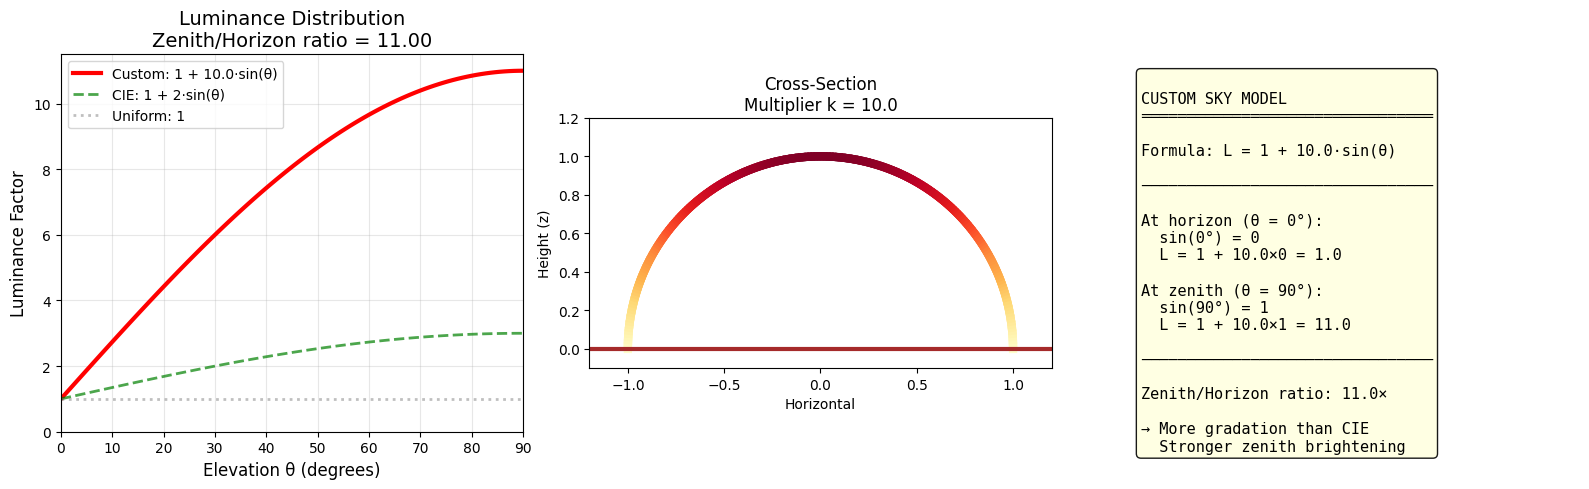

✅ Using multiplier k = 10.0
   Zenith is 11.0× brighter than horizon


In [ ]:
# ═══════════════════════════════════════════════════════════════
# 🎯 EDIT THESE VALUES AND RUN THE CELL TO SEE THE RESULTS!
# ═══════════════════════════════════════════════════════════════

multiplier = 10.0           # Try: 0, 1, etc.
show_cie_reference = True  # Try: True or False

# ═══════════════════════════════════════════════════════════════
# (Code below - no need to edit)
# ═══════════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

elevations = np.linspace(0, 90, 100)
sin_theta = np.sin(np.radians(elevations))

# Custom model: L = 1 + k*sin(θ)
custom_lum = 1 + multiplier * sin_theta
cie_lum = 1 + 2 * sin_theta  # CIE reference
uniform_lum = np.ones_like(sin_theta)

# === Plot 1: Luminance curves ===
ax1 = axes[0]
ax1.plot(elevations, custom_lum, 'r-', linewidth=3,
        label=f'Custom: 1 + {multiplier}·sin(θ)')
if show_cie_reference and multiplier != 2:
    ax1.plot(elevations, cie_lum, 'g--', linewidth=2, alpha=0.7,
            label='CIE: 1 + 2·sin(θ)')
ax1.plot(elevations, uniform_lum, 'gray', linestyle=':', linewidth=2, alpha=0.5,
        label='Uniform: 1')
ax1.set_xlabel('Elevation θ (degrees)', fontsize=12)
ax1.set_ylabel('Luminance Factor', fontsize=12)
ax1.set_title(f'Luminance Distribution\nZenith/Horizon ratio = {custom_lum[-1]/custom_lum[0]:.2f}', fontsize=14)
ax1.set_xlim(0, 90)
ax1.set_ylim(0, max(5, custom_lum[-1] + 0.5))
ax1.grid(True, alpha=0.3)
ax1.legend()

# === Plot 2: Cross-section visualization ===
ax2 = axes[1]
theta_profile = np.linspace(0, np.pi/2, 100)
x_profile = np.cos(theta_profile)
z_profile = np.sin(theta_profile)
lum_profile = 1 + multiplier * z_profile
max_lum = max(lum_profile)
norm = Normalize(vmin=1, vmax=max_lum)

for i in range(len(theta_profile)-1):
    ax2.plot([x_profile[i], x_profile[i+1]], [z_profile[i], z_profile[i+1]],
            color=cm.YlOrRd(norm(lum_profile[i])), linewidth=6)
    ax2.plot([-x_profile[i], -x_profile[i+1]], [z_profile[i], z_profile[i+1]],
            color=cm.YlOrRd(norm(lum_profile[i])), linewidth=6)
ax2.axhline(y=0, color='brown', linewidth=3)
ax2.set_xlabel('Horizontal')
ax2.set_ylabel('Height (z)')
ax2.set_title(f'Cross-Section\nMultiplier k = {multiplier}')
ax2.set_aspect('equal')
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylim(-0.1, 1.2)

# === Plot 3: Interpretation ===
ax3 = axes[2]
ax3.axis('off')
zenith_ratio = (1 + multiplier) / 1

interpretation = f"""
CUSTOM SKY MODEL
════════════════════════════════

Formula: L = 1 + {multiplier:.1f}·sin(θ)

────────────────────────────────

At horizon (θ = 0°):
  sin(0°) = 0
  L = 1 + {multiplier:.1f}×0 = 1.0

At zenith (θ = 90°):
  sin(90°) = 1
  L = 1 + {multiplier:.1f}×1 = {1 + multiplier:.1f}

────────────────────────────────

Zenith/Horizon ratio: {zenith_ratio:.1f}×
"""

if multiplier == 0:
    interpretation += "\n→ UNIFORM SKY\n  Same brightness everywhere"
elif multiplier == 2:
    interpretation += "\n→ CIE STANDARD OVERCAST SKY\n  Zenith is 3× brighter than horizon"
elif multiplier < 2:
    interpretation += "\n→ Less gradation than CIE\n  More uniform distribution"
else:
    interpretation += "\n→ More gradation than CIE\n  Stronger zenith brightening"

ax3.text(0.05, 0.95, interpretation, transform=ax3.transAxes, fontsize=11,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

print(f"✅ Using multiplier k = {multiplier}")
print(f"   Zenith is {zenith_ratio:.1f}× brighter than horizon")


---

## 4. How CIE Luminance Affects VSC Contribution

The total VSC integrates contributions from all sky directions. Each direction contributes based on:
1. **CIE Luminance** — (1 + 2·sin(θ)) — brighter sky = more contribution
2. **Lambert's Cosine Law** — how the light hits the surface
3. **Solid Angle** — the "size" of each sky patch

Explore how elevation bands contribute differently to the total!


In [ ]:
def plot_contribution_by_elevation(highlight_band=45):
    """Show how each elevation band contributes to the total VSC."""
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    # Sample elevations (using bands)
    n_bands = 18
    band_edges = np.linspace(0, 90, n_bands + 1)

    band_centers = (band_edges[:-1] + band_edges[1:]) / 2
    band_width = 90 / n_bands

    # For a horizontal surface looking up
    contributions = []
    cie_factors = []
    solid_angles = []

    for theta_center in band_centers:
        theta_rad = np.radians(theta_center)
        sin_theta = np.sin(theta_rad)
        cos_theta = np.cos(theta_rad)

        # CIE luminance factor
        cie = 1 + 2 * sin_theta
        cie_factors.append(cie)

        # For horizontal surface: surface_flux = sin(theta) (same as z-component)
        surface_flux = sin_theta

        # VSC at this angle
        vsc_at_angle = surface_flux * cie

        # Solid angle (approximate for band)
        # Full ring at this elevation has solid angle ≈ 2π * cos(θ) * dθ
        delta_theta = np.radians(band_width)
        solid_angle = 2 * np.pi * cos_theta * delta_theta
        solid_angles.append(solid_angle)

        # Total contribution from this band
        contribution = vsc_at_angle * solid_angle
        contributions.append(contribution)

    contributions = np.array(contributions)
    cie_factors = np.array(cie_factors)
    solid_angles = np.array(solid_angles)

    # Normalize contributions to percentages
    total = np.sum(contributions)
    contribution_pct = 100 * contributions / total

    # Find which band is highlighted
    highlight_idx = int(highlight_band / band_width)
    if highlight_idx >= n_bands:
        highlight_idx = n_bands - 1

    # === Plot 1: Contribution by elevation band ===
    ax1 = axes[0]

    colors = ['red' if i == highlight_idx else 'steelblue' for i in range(n_bands)]
    bars = ax1.bar(band_centers, contribution_pct, width=band_width*0.9, color=colors,
                   edgecolor='black', alpha=0.8)

    ax1.set_xlabel('Elevation θ (degrees)', fontsize=12)
    ax1.set_ylabel('Contribution to Total VSC (%)', fontsize=12)
    ax1.set_title('Contribution by Elevation Band\n(for horizontal surface)', fontsize=14)
    ax1.set_xlim(0, 90)
    ax1.grid(True, alpha=0.3, axis='y')

    # Annotate highlighted band
    ax1.annotate(f'{contribution_pct[highlight_idx]:.1f}%',
                xy=(band_centers[highlight_idx], contribution_pct[highlight_idx]),
                xytext=(band_centers[highlight_idx], contribution_pct[highlight_idx]+2),
                ha='center', fontsize=11, fontweight='bold', color='red')

    # === Plot 2: Breakdown of factors ===
    ax2 = axes[1]

    x = np.arange(n_bands)
    width = 0.25

    # Normalize each factor to same scale for visualization
    cie_norm = cie_factors / np.max(cie_factors)
    sa_norm = solid_angles / np.max(solid_angles)
    contrib_norm = contributions / np.max(contributions)

    ax2.bar(x - width, cie_norm, width, label='CIE Luminance', color='orange', alpha=0.8)
    ax2.bar(x, sa_norm, width, label='Solid Angle', color='green', alpha=0.8)
    ax2.bar(x + width, contrib_norm, width, label='Total Contribution', color='blue', alpha=0.8)

    # Highlight
    ax2.axvline(x=highlight_idx, color='red', linestyle='--', alpha=0.5)

    ax2.set_xlabel('Elevation Band', fontsize=12)
    ax2.set_ylabel('Normalized Value', fontsize=12)
    ax2.set_title('Factor Breakdown by Band', fontsize=14)
    ax2.set_xticks(x[::3])
    ax2.set_xticklabels([f'{int(band_centers[i])}°' for i in range(0, n_bands, 3)])
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')

    # === Plot 3: Cumulative contribution ===
    ax3 = axes[2]

    cumulative = np.cumsum(contribution_pct)
    ax3.fill_between(band_centers, 0, cumulative, alpha=0.3, color='blue')
    ax3.plot(band_centers, cumulative, 'b-', linewidth=2)

    # Mark highlighted band
    ax3.axvline(x=band_centers[highlight_idx], color='red', linestyle='--', alpha=0.7)
    ax3.scatter([band_centers[highlight_idx]], [cumulative[highlight_idx]],
               c='red', s=150, zorder=5)
    ax3.annotate(f'{cumulative[highlight_idx]:.1f}%\ncumulative',
                xy=(band_centers[highlight_idx]+3, cumulative[highlight_idx]),
                fontsize=10, color='red')

    ax3.set_xlabel('Elevation θ (degrees)', fontsize=12)
    ax3.set_ylabel('Cumulative Contribution (%)', fontsize=12)
    ax3.set_title('Cumulative VSC Contribution', fontsize=14)
    ax3.set_xlim(0, 90)
    ax3.set_ylim(0, 105)
    ax3.grid(True, alpha=0.3)

    # Mark 50% line
    ax3.axhline(y=50, color='gray', linestyle=':', alpha=0.7)
    ax3.text(5, 52, '50% of total', fontsize=9, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Summary
    theta_h = band_centers[highlight_idx]
    print(f"📊 Elevation band around θ = {theta_h:.0f}°:")
    print(f"   CIE luminance factor: {cie_factors[highlight_idx]:.2f}")
    print(f"   Contribution to total: {contribution_pct[highlight_idx]:.1f}%")
    print(f"   Cumulative (0° to {theta_h:.0f}°): {cumulative[highlight_idx]:.1f}%")
    print(f"\n💡 Key insight: Mid-elevations (30-60°) contribute most!")
    print(f"   - Low elevations: bright but small solid angle")
    print(f"   - High elevations: large CIE factor but small area")

interact(
    plot_contribution_by_elevation,
    highlight_band=IntSlider(min=0, max=85, step=5, value=45, description='Highlight θ:')
);


interactive(children=(IntSlider(value=45, description='Highlight θ:', max=85, step=5), Output()), _dom_classes…

---

## Summary

### The CIE Standard Overcast Sky Model

| Formula | Range | Meaning |
|---------|-------|---------|
| $L(\theta) = L_z \cdot \frac{1 + 2\sin(\theta)}{3}$ | 0.33 to 1.0 | Normalized luminance |
| $L \propto (1 + 2z)$ where $z = \sin(\theta)$ | 1 to 3 | Code implementation |

### Key Insights

1. **Zenith is 3× brighter than horizon** — this models real overcast sky conditions
2. **z = sin(θ)** directly gives the vertical coordinate on the unit hemisphere
3. **Mid-elevations (30-60°) contribute most** to the total VSC because they balance brightness and solid angle
4. The **multiplier 2** in the formula is what creates the 3:1 zenith-to-horizon ratio
